In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys
sys.path.append('/nethome/jbang36/eko')



In [3]:
#video_names = ['cherry960', 'ua_detrac960', 'dashcam960', 'jackson']
video_name = 'jackson'

from eko_paper2022.motivation.main import *

images = load_dataset(video_name)

10-13-2022 16:35:15 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/jackson/video.mp4 is (300000, 300, 300, 3)
meta data of the video /srv/data/jbang36/video_data/jackson/video.mp4 is (300000, 300, 300, 3)
100%|██████████| 300000/300000 [00:59<00:00, 5074.31it/s]


In [4]:
dataset_dict = {'jackson': {'through': 1 / 308, 'resnet': 5 * 60 + 4}}

In [5]:
images.shape

(300000, 300, 300, 3)

In [6]:
## we will run 5 versions
### do it in terms of percentage of the overall video --
percentages = [0.001, 0.005, 0.01, 0.05, 0.1]
length = len(images)
anchor_counts = [int(length * percentage) for percentage in percentages]

anchor_counts



[300, 1500, 3000, 15000, 30000]

In [8]:
### for jackson, since the image is 300x300 the throughput is 308 fps.

through = dataset_dict[video_name]['through']
oracle_time = [count * through for count in anchor_counts]
oracle_times_eko = [count * 0.8 * through for count in anchor_counts]

In [9]:
oracle_time

[0.9740259740259741,
 4.870129870129871,
 9.740259740259742,
 48.701298701298704,
 97.40259740259741]

In [10]:
oracle_times_eko

[0.7792207792207793,
 3.8961038961038965,
 7.792207792207793,
 38.961038961038966,
 77.92207792207793]

In [11]:
print('hello world')

hello world


In [12]:
### okay, using the anchor counts, we need to see how much time each method takes. we compare tasti-pt and eko.
### we need to measure the individual times... how much does it take to perform inference?
### how much for the others?
tasti_times = []
for anchor_count in anchor_counts:

    st = time.perf_counter()

    tastipt_results = execute_tastipt(images, video_name, redo = False, nb_buckets = anchor_count)

    et = time.perf_counter()
    tasti_times.append(et - st)


index initializing....
number of training instances:  3000
mining complete!
training complete!
inferring complete!


100%|██████████| 300000/300000 [00:01<00:00, 177400.66it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/300 [00:00<?, ?it/s]

index initializing....
number of training instances:  3000
mining complete!
training complete!
inferring complete!


100%|██████████| 300000/300000 [00:07<00:00, 39224.27it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1500 [00:00<?, ?it/s]

index initializing....
number of training instances:  3000
mining complete!
training complete!
inferring complete!


100%|██████████| 300000/300000 [00:21<00:00, 13719.28it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/3000 [00:00<?, ?it/s]

index initializing....
number of training instances:  3000
mining complete!
training complete!
inferring complete!


100%|██████████| 300000/300000 [02:16<00:00, 2198.62it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/15000 [00:00<?, ?it/s]

index initializing....
number of training instances:  3000
mining complete!
training complete!
inferring complete!


100%|██████████| 300000/300000 [04:55<00:00, 1013.96it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/30000 [00:00<?, ?it/s]

In [ ]:
print('hello world')

In [ ]:
eko_times = []

for anchor_count in anchor_counts:

    st = time.perf_counter()

    ekoalt_results = execute_ekoalt(images, video_name, nb_buckets = anchor_count)

    et = time.perf_counter()
    eko_times.append(et - st)
    

In [ ]:
resnet = dataset_dict[video_name]['resnet']
tasti_times_full = [ot + time + resnet for ot, time in zip(oracle_time, tasti_times)] 
tasti_times_full


In [ ]:
eko_times_full = [ot + et for ot, et in zip(oracle_times_eko, eko_times)]
eko_times_full

In [16]:
#### save these results
#### draw the line graph that we have in mind

tasti_times_full



[316.16640786265395,
 356.26896081666473,
 412.35103890275604,
 860.2506536121492,
 1441.2513208663115]

In [17]:
eko_times_full


[2.8697373091981007,
 6.006028089575567,
 9.697213031158046,
 40.8703838279108,
 79.83879175588683]

In [18]:
percentages

[0.001, 0.005, 0.01, 0.05, 0.1]

In [2]:

x_axis = [0.001, 0.005, 0.01, 0.05, 0.1]
cherry_tasti = [633.3372804836503, 639.043707535203, 647.2957338440631, 714.3713716172747, 799.0932688484235]
cherry_eko = [1.5190060740070683,
 3.9333909255053316,
 6.595604946570737,
 29.631299779351266,
 58.02913059028131]
detrac_tasti = [526.5800948645388,
 530.7852064362594,
 536.436114656393,
 587.5003901263433,
 652.747490400821]
detrac_eko = [4.668228819923741,
 6.991199927840914,
 8.517439313701221,
 28.159733620264703,
 51.52101091399789]
dashcam_tasti = [473.9196554551167,
 477.9584411782878,
 482.7448940779482,
 527.1068221661661,
 576.8626969150134]
dashcam_eko = [1.9541657155965055,
 3.684747119971684,
 5.832442472832543,
 22.993317091869457,
 44.10344604036638]
jackson_tasti = [316.16640786265395,
 356.26896081666473,
 412.35103890275604,
 860.2506536121492,
 1441.2513208663115]
jackson_eko = [2.8697373091981007,
 6.006028089575567,
 9.697213031158046,
 40.8703838279108,
 79.83879175588683]


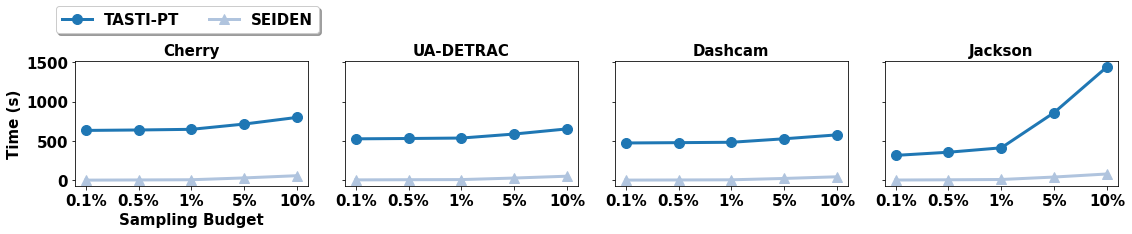

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

font = {
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=15)


x_axis_names = ['0.1%', '0.5%', '1%', '5%', '10%']

x = np.arange(len(x_axis_names))
width = 0.2


### we need to do subplots
rows = 1
columns = 4
fig_size = (16, 3)
fig, axes = plt.subplots(rows, columns, sharey=True, sharex=True, figsize=fig_size)


i = 0
j = 0
axes[i].plot(x_axis_names, cherry_tasti, label = 'TASTI-PT', linewidth = 3, marker = 'o', markersize = 10)
axes[i].plot(x_axis_names, cherry_eko, label = 'SEIDEN', linewidth = 3, color = 'lightsteelblue', marker = '^', markersize = 10)
axes[i].set_ylabel('Time (s)', weight = 'bold', size = 15)
axes[i].set_yticks([0, 500, 1000, 1500])
#plt.ylim(0, 2)
#plt.xticks(x, x_axis_names)
axes[i].set_title('Cherry', weight = 'bold', size = 15)
axes[i].set_xlabel('Sampling Budget', weight = 'bold', size = 15)


i = 1
j = 1
axes[i].plot(x_axis_names, detrac_tasti, label = 'TASTI-PT', linewidth = 3, marker = 'o', markersize = 10)
axes[i].plot(x_axis_names, detrac_eko, label = 'SEIDEN', linewidth = 3, color = 'lightsteelblue', marker = '^', markersize = 10)
axes[i].set_title('UA-DETRAC', weight = 'bold', size = 15)


i = 2
j = 0
axes[i].plot(x_axis_names, dashcam_tasti, label = 'TASTI-PT', linewidth = 3, marker = 'o', markersize = 10)
axes[i].plot(x_axis_names, dashcam_eko, label = 'SEIDEN', linewidth = 3, color = 'lightsteelblue', marker = '^', markersize = 10)

axes[i].set_title('Dashcam', weight = 'bold', size = 15)


i = 3
j = 1
axes[i].plot(x_axis_names, jackson_tasti, label = 'TASTI-PT', linewidth = 3, marker = 'o', markersize = 10)
axes[i].plot(x_axis_names, jackson_eko, label = 'SEIDEN', linewidth = 3, color = 'lightsteelblue', marker = '^', markersize = 10)
axes[i].set_title('Jackson', weight = 'bold', size = 15)
#axes[i][j].set_xlabel('Anchor Percentage', weight = 'bold', size = 15)


fig.tight_layout()

plt.legend(loc='upper center', bbox_to_anchor=(-3, 1.5),
          fancybox=True, shadow=True, ncol=10)
#plt.legend()

plt.savefig('plots/index-construction1.png', bbox_inches='tight')
plt.show()




In [25]:
cherry_tasti, cherry_eko

([633.3372804836503,
  639.043707535203,
  647.2957338440631,
  714.3713716172747,
  799.0932688484235],
 [1.5190060740070683,
  3.9333909255053316,
  6.595604946570737,
  29.631299779351266,
  58.02913059028131])

In [28]:
jackson_tasti, jackson_eko

([316.16640786265395,
  356.26896081666473,
  412.35103890275604,
  860.2506536121492,
  1441.2513208663115],
 [2.8697373091981007,
  6.006028089575567,
  9.697213031158046,
  40.8703838279108,
  79.83879175588683])

In [29]:
860 / 40

21.5

In [26]:
633 / 1.5

422.0

In [27]:
799 / 58

13.775862068965518

In [14]:
tmp = [np.average(np.array(cherry_tasti) / np.array(cherry_eko))

143.0855909839246

In [21]:
np.average(np.array(detrac_tasti) / np.array(detrac_eko))

57.04726534440313

In [22]:
np.average(np.array(dashcam_tasti) / np.array(dashcam_eko))

98.20066901643699

In [15]:
np.average(np.array(jackson_tasti) / np.array(jackson_eko))

50.22281520680913

In [23]:
np.average([143, 57, 98, 50])

87.0

In [26]:
cherry_eko

[1.7200964258185456,
 4.558047913547073,
 8.287958727351256,
 36.68458058099662,
 72.58144926599094]

In [5]:
### run resnet-18

from eko_paper2022.motivation.main import *

import time

st = time.perf_counter()

resnet_results = execute_resnet(images)

et = time.perf_counter()

print('total time', et - st, 'seconds')


cuda


100%|██████████| 9360/9360 [10:47<00:00, 14.45it/s]

total time 650.3217417187989 seconds


In [6]:
## Run Yolov5

st = time.perf_counter()

yolo_results = execute_yolo2(images)

et = time.perf_counter()

print('total time', et - st, 'seconds')


Using cache found in /nethome/jbang36/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-3-2 torch 1.10.2 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


cuda


100%|██████████| 9360/9360 [10:36<00:00, 14.70it/s]


total time 637.4774718210101 seconds


In [ ]:
### run tasti-pt

st = time.perf_counter()

tastipt_results = execute_tastipt(images, video_name, nb_buckets = 10000)

et = time.perf_counter()

print('total time', et - st, 'seconds')


index initializing....
number of training instances:  3000
mining complete!
training complete!


Inference:   0%|          | 0/4680 [00:00<?, ?it/s]

inferring complete!


 36%|███▌      | 26987/74880 [00:07<00:13, 3570.02it/s]

In [17]:
### run eko-alt


st = time.perf_counter()

ekoalt_results = execute_ekoalt(images, video_name, nb_buckets = 10000)

et = time.perf_counter()

print('total time', et - st, 'seconds')


index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
rep indices stats 10000 5349
5350 10000
bucketing complete!


Target DNN Invocations:   0%|          | 0/5350 [00:00<?, ?it/s]

total time 1.5877264514565468 seconds


In [ ]:
### what we can do is designate a lot of the frames to query 

In [ ]:
### we will show 6 graphs, 3 upper graphs will be regarding the difference in time taken when we adjust the total number of anchors






In [ ]:
#### TODO: Need to add invocations!!!

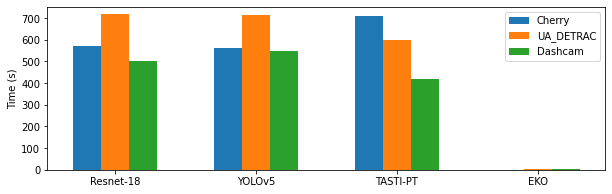

In [16]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
### drawing function for the graph

x_axis_names = ['Resnet-18', 'YOLOv5', 'TASTI-PT', 'EKO']
cherry_values = [571, 564, 708, 1.3]
ua_values = [717, 715, 600, 4.5]
da_values = [500, 550, 420, 2.7]

x = np.arange(len(x_axis_names))
width = 0.2

plt.figure(figsize = (10,3))

plt.bar(x - width, cherry_values, width, label = 'Cherry')
plt.bar(x, ua_values, width, label = 'UA_DETRAC')
plt.bar(x + width, da_values, width, label = 'Dashcam')

plt.ylabel('Time (s)')
plt.xticks(x, x_axis_names)
plt.legend()
plt.show()



In [18]:
tmp = np.array([cherry_values, ua_values, da_values])
tmp

array([[        571,         564,         708,         1.3],
       [        717,         715,         600,         4.5],
       [        500,         550,         420,         2.7]])

In [21]:
tmp.mean(axis = 0)

array([        596,      609.67,         576,      2.8333])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()